In [1]:
import sys 
import os
sys.path.append(r'/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm')
import argparse
import jax.numpy as jnp
import jax.random as jr
import time
import util.io
import experiment_descriptor as ed
import misc
import util.plot
import matplotlib.pyplot as plt
import main 
exp_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/exps/'
data_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/data/experiments/'

## Run experiment

In [2]:
run = False
if run:
    exp_file = exp_root + 'exp0.txt'
    sys.argv = ['', 'trials', '13434', '1', '2', exp_file] 
    args = main.parse_args()
    args.func(args)

In [ ]:
a = jnp.array([True, False, True])
b = jnp.array([False, True, True])

a + b 

Array([ True, False,  True], dtype=bool)

## View experiment

In [3]:
view = False
trial = 1
if view:
    for trial in range(1, 3):
        exp_file = exp_root + 'exp0.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [4]:
view = False
trial = 1
if view:
    for trial in range(1, 2):
        exp_file = exp_root + 'new_exp.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [5]:
view = False
trial = 1
if view:
    for trial in range(1, 2):
        exp_file = exp_root + 'lgssm_bpf_mcmc.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [6]:
view = False
start_trial = 1
end_trial = 11
if view:
    for trial in range(1, 5): #range(start_trial, end_trial):
        exp_file = exp_root + 'lgssm_tsnl_test.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', '-o', 'true', exp_file]
        args = main.parse_args()
        args.func(args)

In [7]:
view = False
if view:
    exp_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/exps/'
    for trial in range(1, 11):
        exp_file = exp_root + 'lgssm_abc.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [8]:
view = True

if view:
    state_dim = 1
    emission_dim = 1

    def get_error(lag):
        avg_error = 0.0
        num=0
        errors = []
        all_dists_trials = []
        for trial in range(1, 101):
            num_timesteps = 100
            sim_dir = data_root + f'/lgssm/state-dim_{state_dim}_emission-dim_{emission_dim}_num-timesteps_{num_timesteps}_target-vars_d4_e2/'
            num_samples = 100
            num_rounds = 6
            train_on = 'best'
            inf_dir = f'nde/tsnl/samples_{num_samples}_rounds_{num_rounds}_lag_{lag}_subsample_0.1_train_on_{train_on}_mcmc_steps_1000/maf_nmades_5_dhidden_32_nhiddens_5/{trial}'
            exp_dir = sim_dir + inf_dir

            try:
                error, _ = util.io.load(os.path.join(exp_dir, 'error'))
                all_dists = util.io.load(os.path.join(exp_dir, 'all_dists'))
                all_dists_trials.append(all_dists)
                errors.append(error)
                avg_error += error
                num += 1

            except FileNotFoundError:
                print('File not found')
                continue

        return avg_error/num, jnp.array(errors), jnp.array(all_dists_trials)
    
    avg_error, all_errors, all_dists_trials = get_error(7)


In [9]:
jnp.mean(all_errors)

Array(3.0324469, dtype=float32)

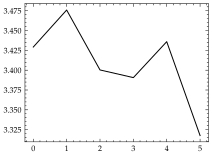

: 

In [ ]:
plt.plot(jnp.mean(jnp.mean(all_dists_trials, axis=0), axis=1))
plt.show()